<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

# Malicioues Url classification

In [ ]:
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse
import os.path

In [ ]:
dataset = pd.read_csv("/content/malicious_phish.csv")

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

In [ ]:
dataset.info()

In [ ]:
print("Dataset shape:", dataset.shape)

In [ ]:
dataset.keys()

In [ ]:
dataset['type'].value_counts()

In [ ]:
dataset['url'].value_counts()

In [ ]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

In [ ]:
dataset.isnull().sum()

In [ ]:
print(dataset)

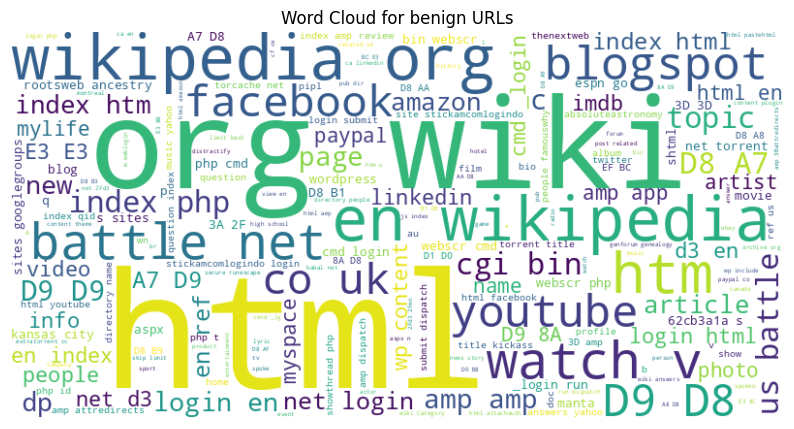

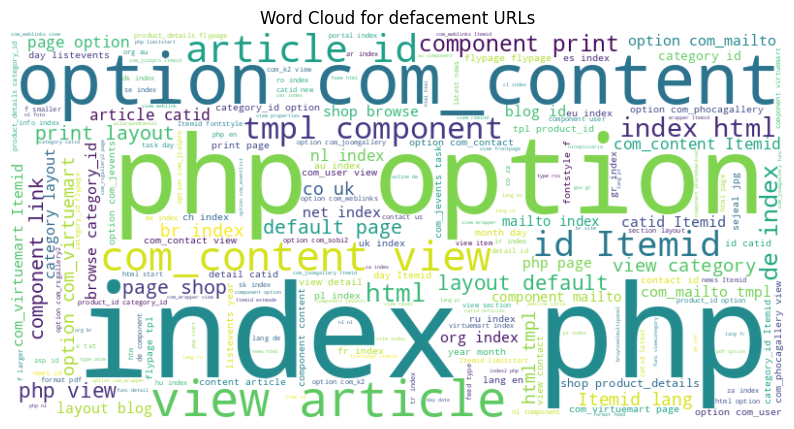

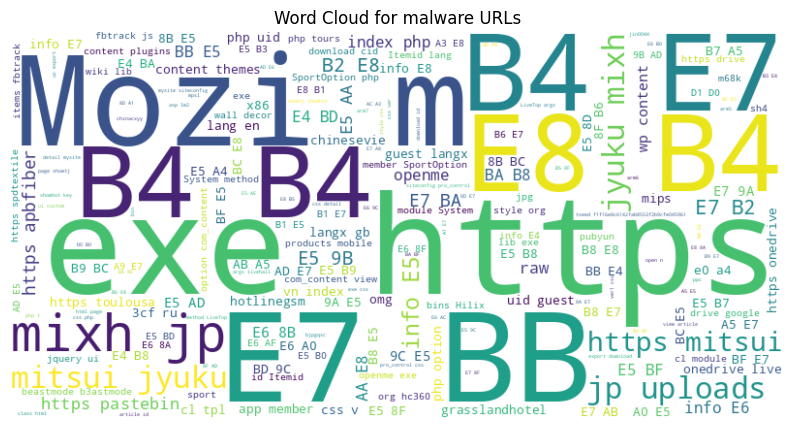

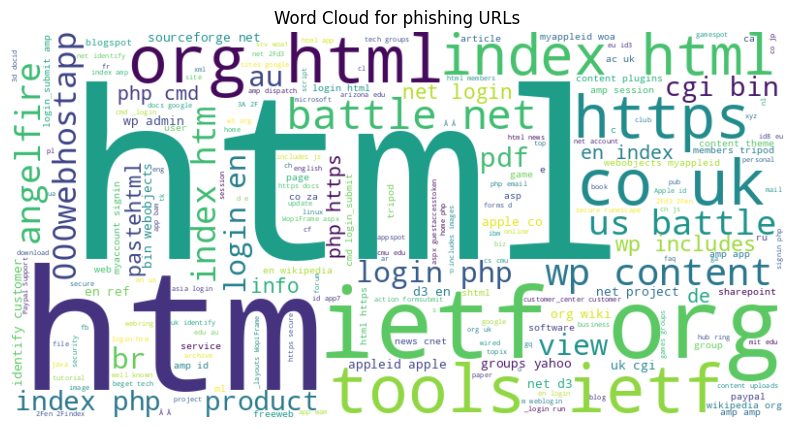

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the actual filename and path


# Group URLs by their types
grouped_urls = dataset.groupby('type')['url'].apply(lambda x: ' '.join(x))

# Generate a word cloud for each type of URLs
for url_type, urls in grouped_urls.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(urls)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {url_type} URLs')
    plt.axis('off')
    plt.show()



# PrePreprocessing¶

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["class_url"] = lb_make.fit_transform(dataset["type"])
dataset["class_url"].value_counts()

class_url
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [ ]:
def url_length(url):
    return len(str(url))
dataset['url_length'] = dataset['url'].apply(lambda i: url_length(i))
dataset

,url,type,class_url,url_length
0,br-icloud.com.br,phishing,3,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45


In [ ]:
import seaborn as sns

In [ ]:
def generate_bar_chart(column_name):

    avg_column_by_type = dataset.groupby('type')[column_name].mean().reset_index()

    # Define color palette
    colors = sns.color_palette("husl", len(avg_column_by_type))

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(avg_column_by_type['type'], avg_column_by_type[column_name], color=colors)

    # Add labels and title
    plt.title(f'Average {column_name.replace("_", " ").title()} by Type')
    plt.xlabel('URL Type')
    plt.ylabel(f'Average {column_name.replace("_", " ").title()}')

    # Show plot
    plt.show()


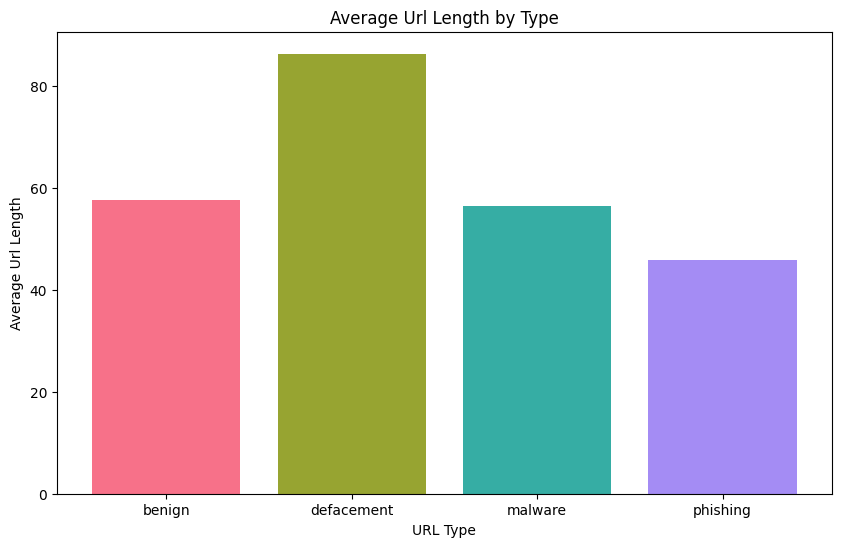

In [ ]:
generate_bar_chart("url_length")

In [ ]:
from urllib.parse import urlparse

def hostname_length(url):
    return len(urlparse(url).netloc)

dataset['hostname_length'] = dataset['url'].apply(lambda i: hostname_length(i))
dataset

,url,type,class_url,url_length,hostname_length
0,br-icloud.com.br,phishing,3,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0


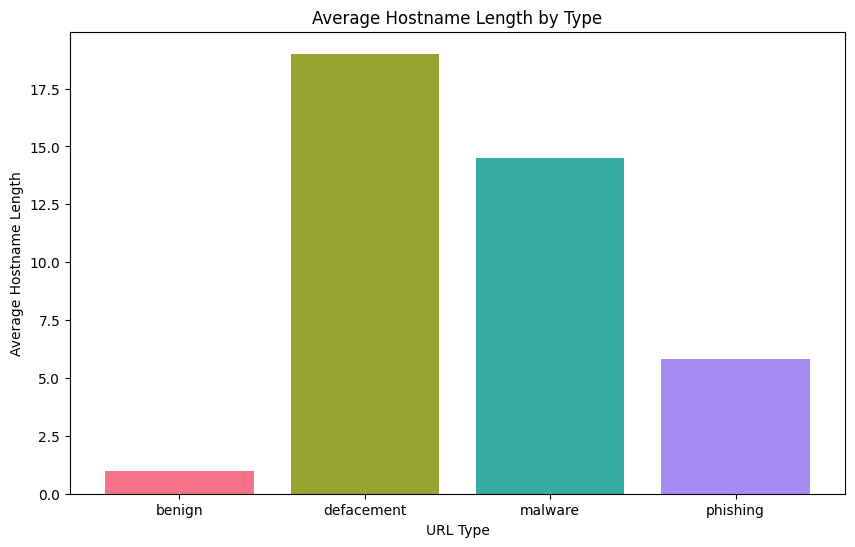

In [ ]:
generate_bar_chart("hostname_length")

In [ ]:
def count_www(url):
    url.count('www')
    return url.count('www')

dataset['count-www'] = dataset['url'].apply(lambda i: count_www(i))
dataset


,url,type,class_url,url_length,hostname_length,count-www
0,br-icloud.com.br,phishing,3,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0


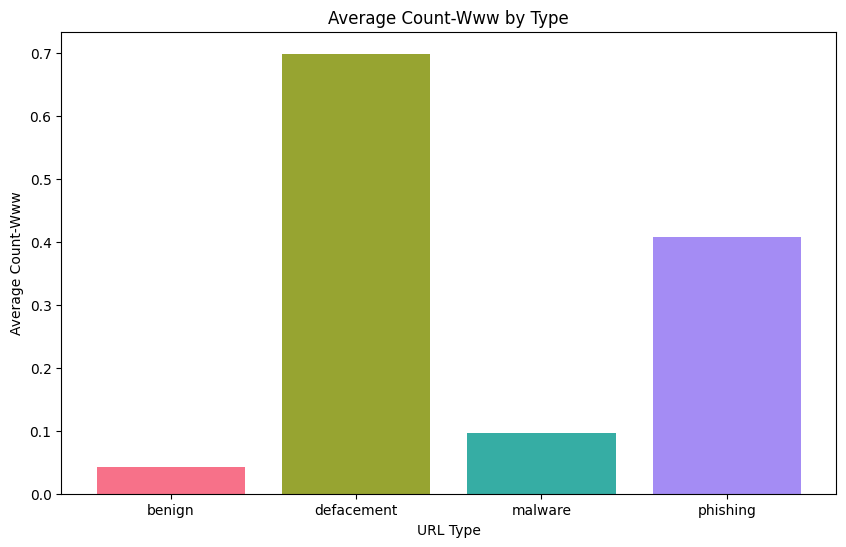

In [ ]:
generate_bar_chart("count-www")


In [ ]:
def count_https(url):
    return url.count('https')

dataset['count-https'] = dataset['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

dataset['count-http'] = dataset['url'].apply(lambda i : count_http(i))

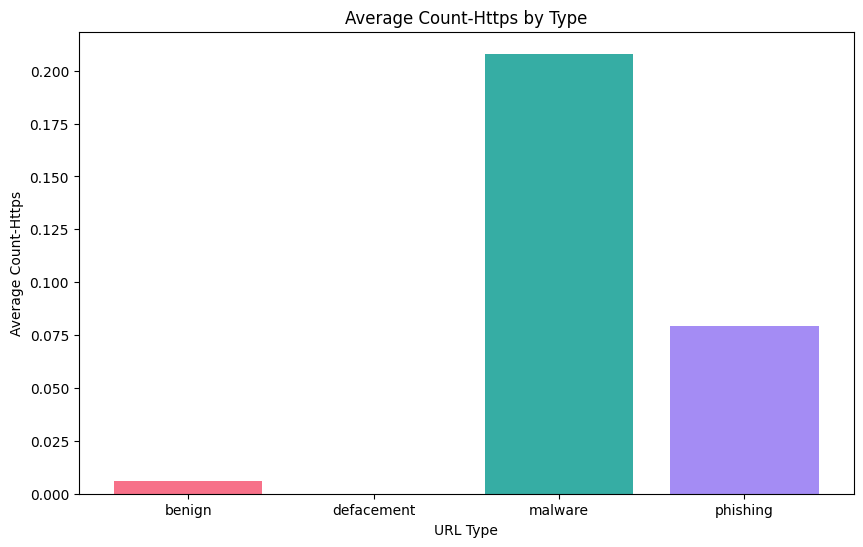

In [ ]:
generate_bar_chart("count-https")

In [ ]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

dataset['count.'] = dataset['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')

dataset['count%'] = dataset['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

dataset['count?'] = dataset['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

dataset['count-'] = dataset['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

dataset['count='] = dataset['url'].apply(lambda i: count_equal(i))

def count_atrate(url):

    return url.count('@')

dataset['count@'] = dataset['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

dataset['count_dir'] = dataset['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

dataset['count_embed_domian'] = dataset['url'].apply(lambda i: no_of_embed(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,0,0,0,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,0,2,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,0,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,0,0,0,0,2,0


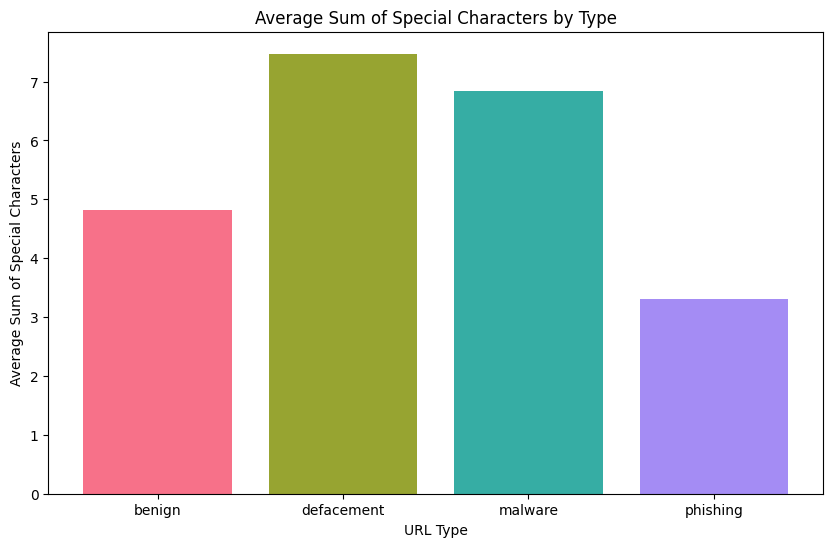

In [ ]:
def count_special_chars(url):
    special_chars = ['.', '%', '?', '-', '=', '@']
    count = sum(url.count(char) for char in special_chars)
    return count

# Add a new column for the sum of special characters
dataset['sum_special_chars'] = dataset['url'].apply(lambda i: count_special_chars(i))

# Group URLs by their types and calculate the average sum of special characters
avg_special_chars_by_type = dataset.groupby('type')['sum_special_chars'].mean().reset_index()

# Define color palette
colors = sns.color_palette("husl", len(avg_special_chars_by_type))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_special_chars_by_type['type'], avg_special_chars_by_type['sum_special_chars'], color=colors)

# Add labels and title
plt.title('Average Sum of Special Characters by Type')
plt.xlabel('URL Type')
plt.ylabel('Average Sum of Special Characters')

# Show plot
plt.show()

In [ ]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

dataset['short_url'] = dataset['url'].apply(lambda i: shortening_service(i))

<Figure size 1000x600 with 0 Axes>

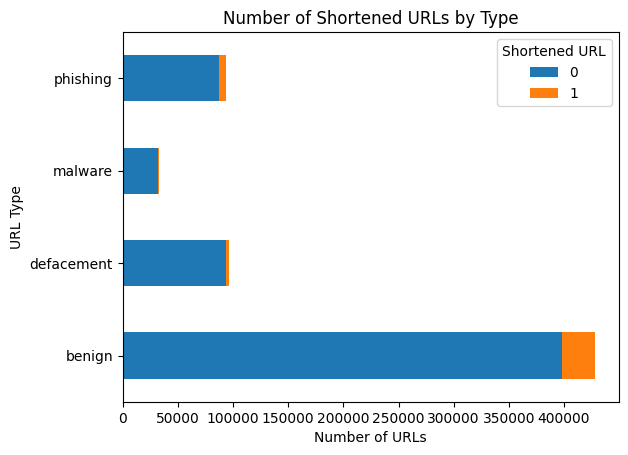

In [ ]:
count_short_urls_by_type = dataset.groupby(['type', 'short_url']).size().unstack(fill_value=0)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
count_short_urls_by_type.plot(kind='barh', stacked=True)

# Add labels and title
plt.title('Number of Shortened URLs by Type')
plt.ylabel('URL Type')
plt.xlabel('Number of URLs')
plt.legend(title='Shortened URL')

# Show plot
plt.show()


In [ ]:
!pip install tld

In [ ]:
from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

dataset['fd_length'] = dataset['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
dataset['tld'] = dataset['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

dataset['tld_length'] = dataset['tld'].apply(lambda i: tld_length(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count-,count=,count@,count_dir,count_embed_domian,sum_special_chars,short_url,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,1,0,0,0,0,3,0,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,2,0,2,0,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,3,0,2,0,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,1,4,0,1,0,9,0,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,1,3,0,1,0,7,0,9,net,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,0,0,3,0,3,0,7,None,-1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,2,0,0,4,0,4,1,8,None,-1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,0,0,0,4,0,2,1,7,None,-1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,0,0,2,0,2,0,4,None,-1


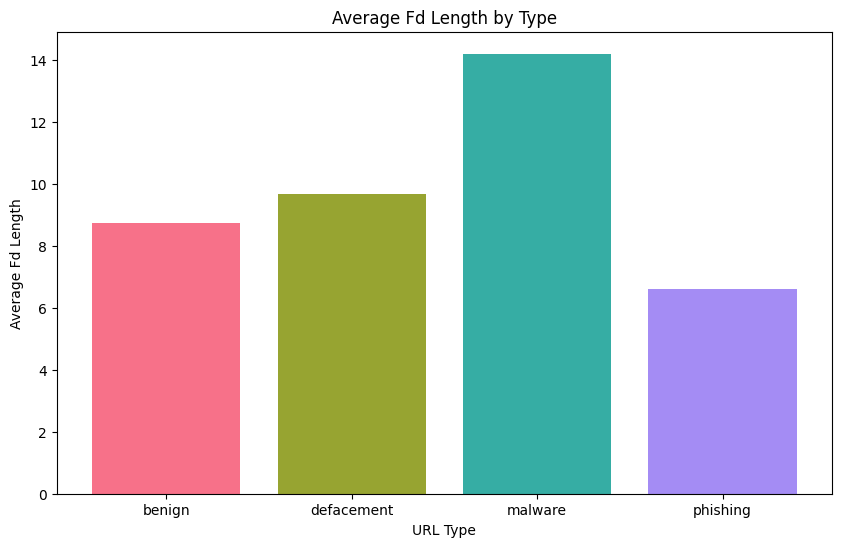

In [ ]:
generate_bar_chart("fd_length")


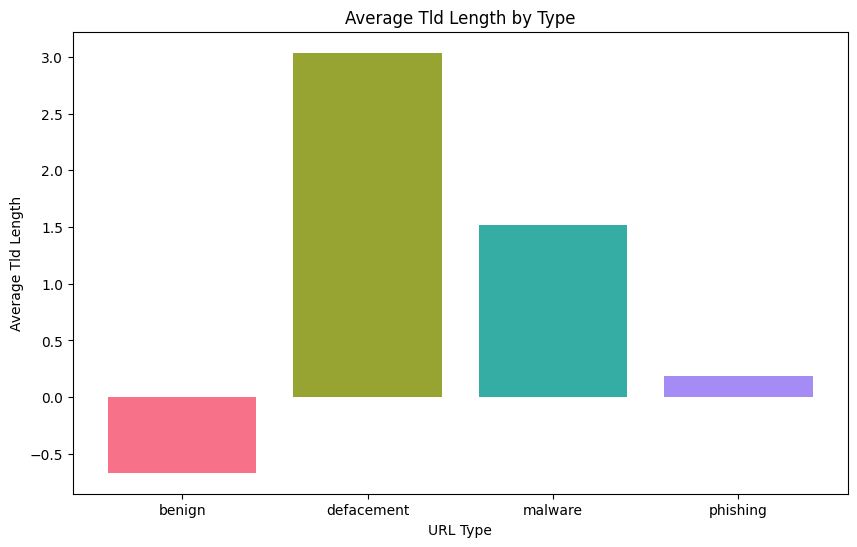

In [ ]:
generate_bar_chart("tld_length")

In [ ]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

dataset['sus_url'] = dataset['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

dataset['count-digits']= dataset['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


dataset['count-letters']= dataset['url'].apply(lambda i: letter_count(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_dir,count_embed_domian,sum_special_chars,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,3,0,0,None,-1,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,2,0,2,0,5,None,-1,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,3,0,2,0,7,None,-1,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,1,0,9,0,9,be,2,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,1,0,7,0,9,net,3,0,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,3,0,3,0,7,None,-1,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,4,0,4,1,8,None,-1,0,7,29
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,4,0,2,1,7,None,-1,0,3,33
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,2,0,2,0,4,None,-1,0,0,36


In [ ]:
dataset['sus_url'].unique().sum()

1

In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
dataset['abnormal_url'] = dataset['url'].apply(lambda i: abnormal_url(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,count_embed_domian,sum_special_chars,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,3,0,0,None,-1,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,2,0,5,None,-1,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,2,0,7,None,-1,0,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,9,0,9,be,2,0,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,7,0,9,net,3,0,22,199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,3,0,7,None,-1,0,12,21,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,0,4,1,8,None,-1,0,7,29,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,0,2,1,7,None,-1,0,3,33,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,2,0,4,None,-1,0,0,36,0


In [ ]:
#Use of IP or not in domain
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
dataset['use_of_ip_address'] = dataset['url'].apply(lambda i: having_ip_address(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,sum_special_chars,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,3,0,0,None,-1,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,2,0,5,None,-1,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,2,0,7,None,-1,0,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,9,0,9,be,2,0,7,63,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,7,0,9,net,3,0,22,199,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,3,0,7,None,-1,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,4,1,8,None,-1,0,7,29,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,2,1,7,None,-1,0,3,33,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,2,0,4,None,-1,0,0,36,0,0


In [ ]:
dataset['use_of_ip_address'].value_counts()

use_of_ip_address
0    643898
1      7293
Name: count, dtype: int64

In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
dataset['google_index'] = dataset['url'].apply(lambda i: google_index(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,...,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,...,0,0,None,-1,0,0,13,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,5,None,-1,0,1,29,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,7,None,-1,0,1,25,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,...,0,9,be,2,0,7,63,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,...,0,9,net,3,0,22,199,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,...,0,7,None,-1,0,12,21,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,...,1,8,None,-1,0,7,29,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,...,1,7,None,-1,0,3,33,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,...,0,4,None,-1,0,0,36,0,0,1


In [ ]:
dataset.isnull().sum()

url                        0
type                       0
class_url                  0
url_length                 0
hostname_length            0
count-www                  0
count-https                0
count-http                 0
count.                     0
count%                     0
count?                     0
count-                     0
count=                     0
count@                     0
count_dir                  0
count_embed_domian         0
sum_special_chars          0
short_url                  0
fd_length                  0
tld                   475281
tld_length                 0
sus_url                    0
count-digits               0
count-letters              0
abnormal_url               0
use_of_ip_address          0
google_index               0
dtype: int64

In [ ]:
dataset.shape

(651191, 27)

In [ ]:
X = dataset[['use_of_ip_address','abnormal_url', 'google_index', 'count-www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
           'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters']]

y = dataset['class_url']

In [ ]:
X

,use_of_ip_address,abnormal_url,google_index,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,1,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,1,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,1,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,1,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,0,1,0,0,3,0,0,0,0,...,0,0,0,39,0,0,7,-1,12,21
651187,0,0,1,0,0,4,0,1,0,0,...,0,2,0,44,0,0,8,-1,7,29
651188,0,0,1,1,0,4,0,1,0,0,...,0,0,0,42,0,0,7,-1,3,33
651189,0,0,1,0,0,2,0,0,0,0,...,0,0,0,45,0,0,4,-1,0,36


In [ ]:
y

0         3
1         0
2         0
3         1
4         1
         ..
651186    3
651187    3
651188    3
651189    3
651190    3
Name: class_url, Length: 651191, dtype: int64

In [ ]:
dataset["class_url"].unique().sum()

6

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# prompt: remove the one with class 4

df = dataset[dataset["class_url"] != 4]
df.shape


(651191, 27)

In [ ]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (520952, 21)
Y_train Shape : (520952,)
X_test  Shape : (130239, 21)
Y_test  Shape : (130239,)


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=0)
classifier1.fit(X_train.values, y_train.values)
y_pred1 = classifier1.predict(X_test.values)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[83055   642   243  1681]
 [  723 18114   194   261]
 [  459   997  4625   423]
 [ 8792  1696   740  7594]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy1:", accuracy1)

Accuracy1: 0.8706147928039988


In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier3 = GaussianNB()
classifier3.fit(X_train.values, y_train.values)
y_pred3 = classifier3.predict(X_test.values)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[76252  5275  1470  2624]
 [    8 19216    50    18]
 [  236  2652  3555    61]
 [ 7729  2908   975  7210]]


In [ ]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy3:", accuracy3)

Accuracy3: 0.8156773316748439


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier4.fit(X_train.values, y_train.values)
y_pred4 = classifier4.predict(X_test.values)

In [ ]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[83733    26    39  1823]
 [   38 18968    51   235]
 [   33    59  6136   276]
 [ 2601   386   216 15619]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy4:", accuracy4)

Accuracy4: 0.95559701779037


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators=100,max_features='sqrt')
classifier5.fit(X_train.values,y_train.values)
y_pred5 = classifier5.predict(X_test.values)

In [ ]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[84287     8     9  1317]
 [   28 19138    12   114]
 [   36    61  6119   288]
 [ 2375   343    75 16029]]


In [ ]:
accuracy5 = metrics.accuracy_score(y_test, y_pred5)
print("Accuracy5:", accuracy5)

Accuracy5: 0.9641735578436567


In [ ]:
data = {
    'Model': ['LogisticRegression', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'Accuracy': [accuracy1, accuracy3, accuracy4, accuracy5]
}

accuracy_table = pd.DataFrame(data)
print(accuracy_table)

                    Model  Accuracy
0      LogisticRegression  0.870615
1              GaussianNB  0.815677
2  DecisionTreeClassifier  0.955597
3  RandomForestClassifier  0.964174


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


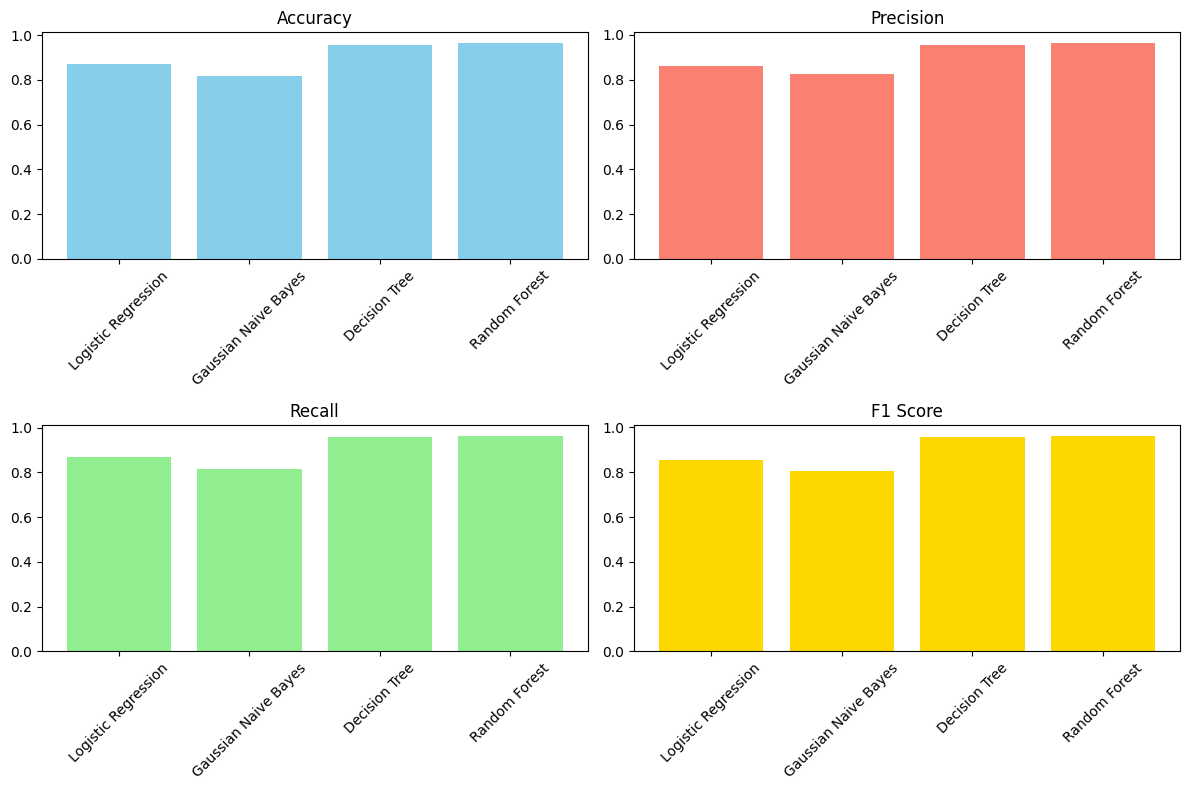

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=0)
}

# Train classifiers and make predictions
predictions = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train.values, y_train.values)
    y_pred = classifier.predict(X_test.values)
    predictions[name] = y_pred

accuracy = {}
precision = {}
recall = {}
f1_score = {}

for name, y_pred in predictions.items():
    accuracy[name] = metrics.accuracy_score(y_test.values, y_pred)
    precision[name] = metrics.precision_score(y_test.values, y_pred, average='weighted')  # specify average='weighted' for multiclass
    recall[name] = metrics.recall_score(y_test.values, y_pred, average='weighted')  # specify average='weighted' for multiclass
    f1_score[name] = metrics.f1_score(y_test.values, y_pred, average='weighted')  # specify average='weighted' for multiclass

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.bar(range(len(accuracy)), list(accuracy.values()), align='center', color='skyblue')
plt.xticks(range(len(accuracy)), list(accuracy.keys()), rotation=45)
plt.title('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
plt.bar(range(len(precision)), list(precision.values()), align='center', color='salmon')
plt.xticks(range(len(precision)), list(precision.keys()), rotation=45)
plt.title('Precision')

# Recall plot
plt.subplot(2, 2, 3)
plt.bar(range(len(recall)), list(recall.values()), align='center', color='lightgreen')
plt.xticks(range(len(recall)), list(recall.keys()), rotation=45)
plt.title('Recall')

# F1 Score plot
plt.subplot(2, 2, 4)
plt.bar(range(len(f1_score)), list(f1_score.values()), align='center', color='gold')
plt.xticks(range(len(f1_score)), list(f1_score.keys()), rotation=45)
plt.title('F1 Score')

plt.tight_layout()
plt.show()


In [ ]:
def get_url(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)

    status.append(tld_length(tld))

    return status

In [ ]:
def model_predict1(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier1.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict2(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier2.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res
def model_predict3(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier3.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict4(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier4.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict5(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier5.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res

    elif int(pred[0]) == 1:
        res="Defacement"
        return res

    elif int(pred[0]) == 2:
        res="Phising"
        return res

    elif int(pred[0]) == 3:
        res="Malware"
        return res

In [ ]:
urls = ['www.kaggle.com',
        'en.wikipedia.org/wiki/Main_Page',
        'http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15',
        'bopsecrets.org/rexroth/cr/1.htm',
       'www.stackoverflow.com/questions/',
       'www.google.com/']
print("----------------------------------------------")
print("LogisticRegression")
for url in urls:
     print(model_predict1(url))



print("----------------------------------------------")
print("GaussianNB")
for url in urls:
     print(model_predict3(url))

print("----------------------------------------------")
print("DecisionTreeClassifier")
for url in urls:
     print(model_predict4(url))

print("----------------------------------------------")
print("RandomForest")
for url in urls:
     print(model_predict5(url))

----------------------------------------------
LogisticRegression
Malware
Bening
Malware
Bening
Malware
Malware
----------------------------------------------
GaussianNB
Malware
Malware
Phising
Malware
Malware
Malware
----------------------------------------------
DecisionTreeClassifier
Bening
Malware
Phising
Bening
Bening
Bening
----------------------------------------------
RandomForest
Bening
Bening
Defacement
Bening
Bening
Bening


In [ ]:
from joblib import dump

# dump(classifier1, 'LogisticRegression.joblib')
# dump(classifier2, 'KNeighborsClassifier.joblib')
# dump(classifier3, 'GaussianNB.joblib')
# dump(classifier4, 'DecisionTreeClassifier.joblib')
dump(classifier5, 'RandomForestClassifier.joblib')

['RandomForestClassifier.joblib']